<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/Circadian_period_q10_for_cyano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circadian period Q<sub>10</sub> calculator for cyano


Temperature =  [25.6 26.4 26.8 27.4 27.6 28.1 28.6 29.1 29.6 29.8 30.5 30.6 30.8 31.
 31.1 31.4 31.6 31.7 31.8 32.  32.4 32.7 33.  33.5 33.8 34.1 34.3 34.9
 35.4]
Period =  [23.1 22.8 22.5 22.  22.  21.8 21.2 21.  20.7 20.6 20.6 20.4 20.4 20.2
 20.  19.7 19.9 19.6 19.7 19.1 19.2 19.1 18.9 18.8 18.7 18.5 18.1 18.5
 17.9] 

Tau30 (estimated period length at 30°C) = 20.602 ± 0.034
Q10 (temperature coefficient) = 1.304 ± 0.008
R² = 0.985661 



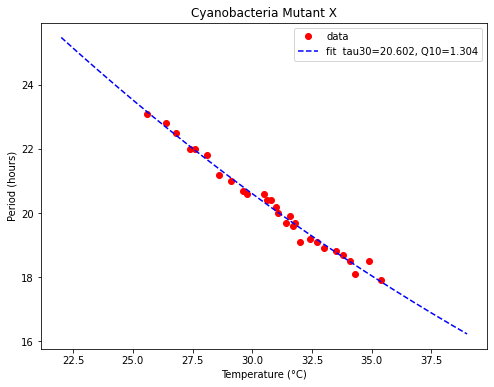

In [ ]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Data description (plot title)
Data_description = "Cyanobacteria Mutant X" #@param {type:"string"}

# Temperature data
Temperatures = 25.6, 26.4, 26.8, 27.4, 27.6, 28.1, 28.6, 29.1, 29.6, 29.8, 30.5, 30.6, 30.8, 31, 31.1, 31.4, 31.6, 31.7, 31.8, 32, 32.4, 32.7, 33, 33.5, 33.8, 34.1, 34.3, 34.9, 35.4 #@param {type:"raw"}
x = np.array(Temperatures) 

# Period data
Periods =  23.1, 22.8, 22.5, 22, 22, 21.8, 21.2, 21, 20.7, 20.6, 20.6, 20.4, 20.4, 20.2, 20, 19.7, 19.9, 19.6, 19.7, 19.1, 19.2, 19.1, 18.9, 18.8, 18.7, 18.5, 18.1, 18.5, 17.9 #@param {type:"raw"}
y = np.array(Periods)

# Printing the data
print('Temperature = ', x)
print('Period = ', y, '\n')

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "No" #@param ["No", "Yes"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau30 : period at 30 degree Celsius
#     q10 : temperature coefficient (Q10)
def func(x, tau30, q10):
	return tau30 / ( q10 ** ( ( x - 30 ) * 0.1 ) )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)

# Printing the results
print(u'Tau30 (estimated period length at 30\u00B0C) =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5))
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))

residuals = y - func(x, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y-np.mean(y))**2)
r_squared = 1 - ( ss_residuals / ss_total )
print(u'R\u00B2 =', '{:.6f}'.format(r_squared), u'\n')

fig = plt.figure(figsize = (8,6))
fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.333 )
fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.333 ) + 1
fcx = np.linspace(fcxmin, fcxmax, 200)
	
plt.plot(x, y, 'o', color ='red', label ='data')
fcy = func(fcx, popt[0], popt[1])	
plt.plot(fcx, fcy, '--', color='blue', label ='fit  tau30=%5.3f, Q10=%5.3f' % tuple(popt))
plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

if Display_tab_delimited_data == "Yes":
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:	
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for fcxseq in fcx:	
		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
		fcycount += 1
	print(u'\n')

plt.legend()
plt.show()

### End of script